### `Importing Libraries`

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### `Data Generation`

In [ ]:
np.random.seed(42)
n_samples = 200
hours_studied = np.clip(np.random.normal(5, 2, n_samples), 0, 12)
attendance = np.clip(np.random.normal(75, 15, n_samples), 30, 100)
previous_score = np.clip(np.random.normal(70, 15, n_samples), 40, 100)
sleep_hours = np.clip(np.random.normal(7, 1.5, n_samples), 4, 10)
assignment_completion = np.clip(hours_studied * 8 + np.random.normal(0, 10, n_samples), 0, 100)
parental_education = np.random.choice([1, 2], n_samples, p=[0.9, 0.1])
final_score = (
    3.5 * hours_studied +
    0.3 * attendance +
    0.2 * previous_score +
    2.0 * sleep_hours +
    0.1 * assignment_completion +
    5 * parental_education +
    np.random.normal(0, 5, n_samples)
)
final_score = np.clip(final_score, 0, 100)
df = pd.DataFrame({
    'Hours_Studied': hours_studied.round(1),
    'Attendance_Percentage': attendance.round(1),
    'Previous_Score': previous_score.round(1),
    'Sleep_Hours': sleep_hours.round(1),
    'Assignment_Completion': assignment_completion.round(1),
    'Parental_Education_Level': parental_education,
    'Final_Score': final_score.round(1)
})

In [5]:
df.head()

,Hours_Studied,Attendance_Percentage,Previous_Score,Sleep_Hours,Assignment_Completion,Parental_Education_Level,Final_Score
0,6.0,80.4,46.1,8.1,57.3,1,77.9
1,4.7,83.4,61.0,5.6,32.6,1,84.5
2,6.3,91.2,70.1,8.3,51.3,1,95.1
3,8.0,90.8,70.7,9.0,59.7,1,97.0
4,4.5,54.3,63.2,7.6,31.9,1,55.7


In [8]:
df.shape

(200, 7)

In [14]:
df.isnull().sum()

Hours_Studied               0
Attendance_Percentage       0
Previous_Score              0
Sleep_Hours                 0
Assignment_Completion       0
Parental_Education_Level    0
Final_Score                 0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hours_Studied             200 non-null    float64
 1   Attendance_Percentage     200 non-null    float64
 2   Previous_Score            200 non-null    float64
 3   Sleep_Hours               200 non-null    float64
 4   Assignment_Completion     200 non-null    float64
 5   Parental_Education_Level  200 non-null    int64  
 6   Final_Score               200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


In [17]:
df.describe()

,Hours_Studied,Attendance_Percentage,Previous_Score,Sleep_Hours,Assignment_Completion,Parental_Education_Level,Final_Score
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,4.920000,75.846500,68.689000,7.005000,40.647000,1.105000,77.161500
std,1.853694,13.707137,14.443634,1.465611,17.404386,0.307323,11.375874
min,0.000000,30.000000,40.000000,4.000000,0.000000,1.000000,46.400000
25%,3.600000,65.925000,58.075000,5.900000,28.275000,1.000000,70.575000
50%,5.000000,76.150000,68.850000,7.000000,40.200000,1.000000,77.150000
75%,6.000000,85.325000,78.600000,8.000000,53.050000,1.000000,84.525000
max,10.400000,100.000000,100.000000,10.000000,95.200000,2.000000,100.000000


### `Feature Selection`

In [22]:
cor = df.corr()
cor

,Hours_Studied,Attendance_Percentage,Previous_Score,Sleep_Hours,Assignment_Completion,Parental_Education_Level,Final_Score
Hours_Studied,1.000000,0.092739,-0.135972,0.066495,0.835511,-0.113084,0.726642
Attendance_Percentage,0.092739,1.000000,-0.057185,-0.121297,0.010181,-0.078823,0.408856
Previous_Score,-0.135972,-0.057185,1.000000,0.102866,-0.100674,-0.063022,0.165799
Sleep_Hours,0.066495,-0.121297,0.102866,1.000000,0.152017,-0.116085,0.297283
Assignment_Completion,0.835511,0.010181,-0.100674,0.152017,1.000000,-0.089334,0.672095
Parental_Education_Level,-0.113084,-0.078823,-0.063022,-0.116085,-0.089334,1.000000,-0.067688
Final_Score,0.726642,0.408856,0.165799,0.297283,0.672095,-0.067688,1.000000


In [31]:
print("Correlation With Target:\n",cor['Final_Score'].sort_values(ascending = False))
print("\nHigh correlation pair:", df['Hours_Studied'].corr(df['Assignment_Completion']))
low_var = df.var()[df.var() < 0.5].index.tolist()
print("Low variance features to drop:", low_var)
df = df.drop(['Assignment_Completion', 'Parental_Education_Level'], axis=1) # based on analysis

Correlation With Target:
 Final_Score                 1.000000
Hours_Studied               0.726642
Assignment_Completion       0.672095
Attendance_Percentage       0.408856
Sleep_Hours                 0.297283
Previous_Score              0.165799
Parental_Education_Level   -0.067688
Name: Final_Score, dtype: float64


KeyError: 'Assignment_Completion'

In [33]:
df.shape

(200, 5)

### `Split`

In [35]:
# 4. Split: Features/Target, Train/Test
X = df.drop('Final_Score', axis=1)
y = df['Final_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### `Standardization` 

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### `Model Training`

In [37]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

### `Coefficients (Feature Importance)`

In [47]:
print("Intercept:",reg.intercept_)
print("\nCoefficients:")
for name, coef in zip(X.columns, reg.coef_):
    print(f"{name}: {coef}")

Intercept: 76.80375

Coefficients:
Hours_Studied: 7.89173967970344
Attendance_Percentage: 4.368176007796504
Previous_Score: 2.710875700585428
Sleep_Hours: 3.133522115694372


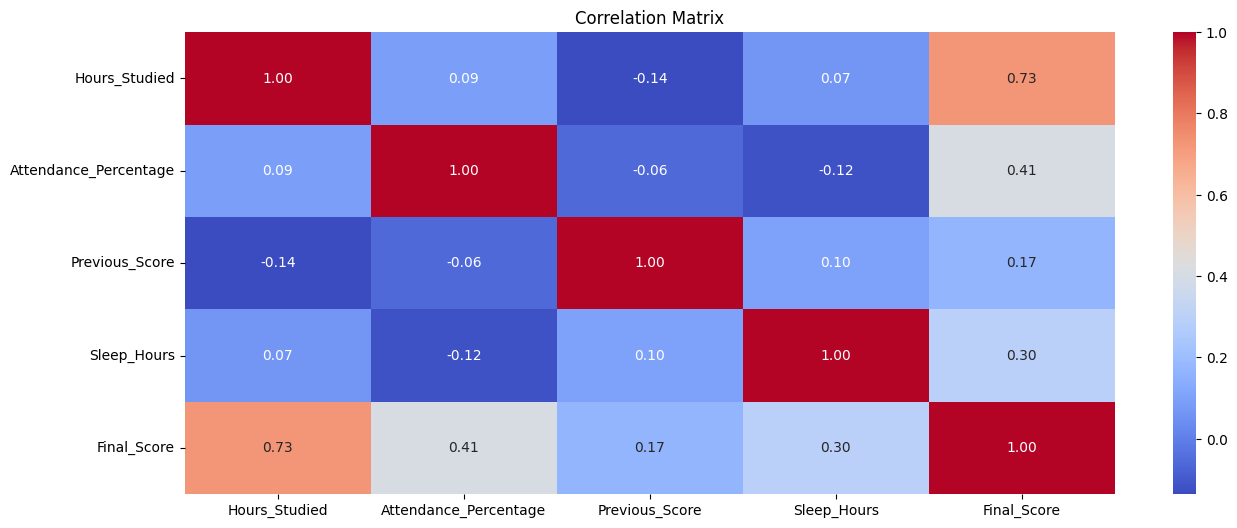

In [ ]:
# TODO: Heatmap of Feature Correlations
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### `Prediction`

In [44]:
y_pred = reg.predict(X_test_scaled)
y_pred

array([62.28012428, 74.72278954, 60.29127358, 67.16554331, 80.28365914,
       85.66626373, 74.28560251, 72.27100158, 92.0891867 , 70.89860511,
       85.66228696, 61.34779901, 75.41185432, 87.04646196, 84.25030355,
       91.83751593, 75.98274098, 75.71000329, 91.50379038, 70.47228543,
       76.13616866, 69.98158997, 77.31312229, 77.97456067, 82.61220569,
       72.31869115, 72.75681131, 85.88370715, 84.48273209, 69.94147658,
       96.04529163, 72.20530747, 81.07178893, 83.14656108, 78.31090041,
       69.39373495, 91.36045962, 75.37845229, 95.6243529 , 77.22964684])

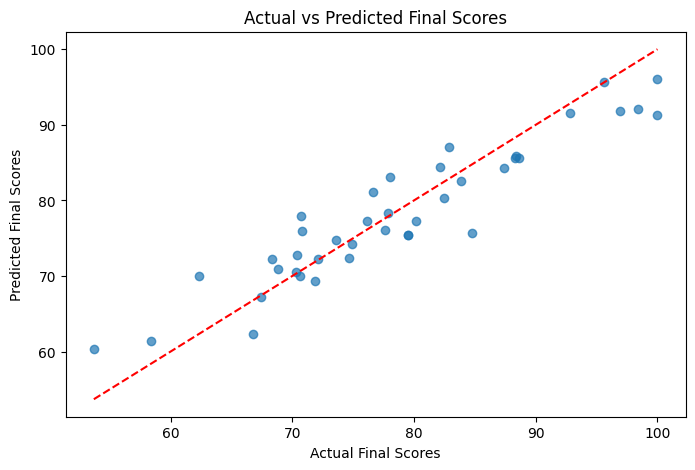

In [ ]:
# TODO: Actual vs Predicted (Scatter Plot)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Final Scores')
plt.ylabel('Predicted Final Scores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Final Scores')
plt.show()

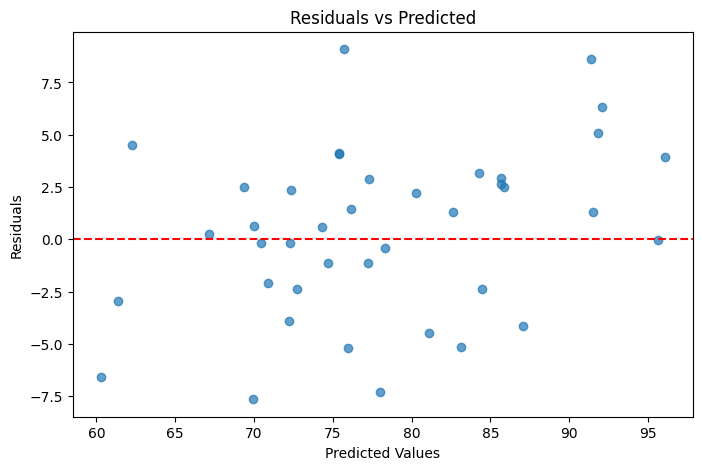

In [ ]:
# TODO:Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Res# 4. Distribution of Residuals (Check for normality)
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()iduals vs Predicted')
plt.show()

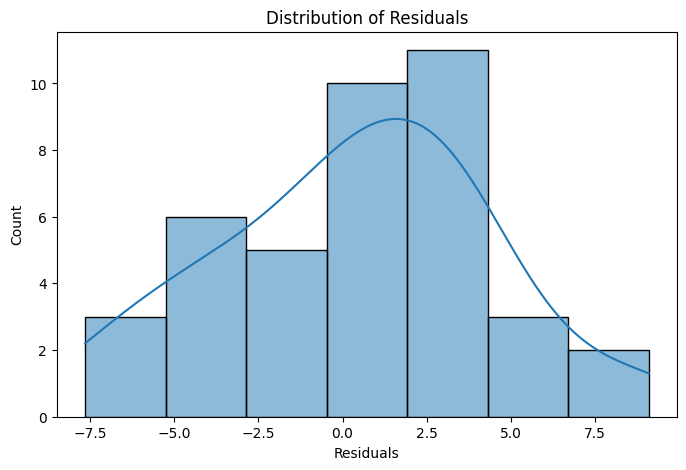

In [54]:
# Distribution of Residuals (Check for normality)
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

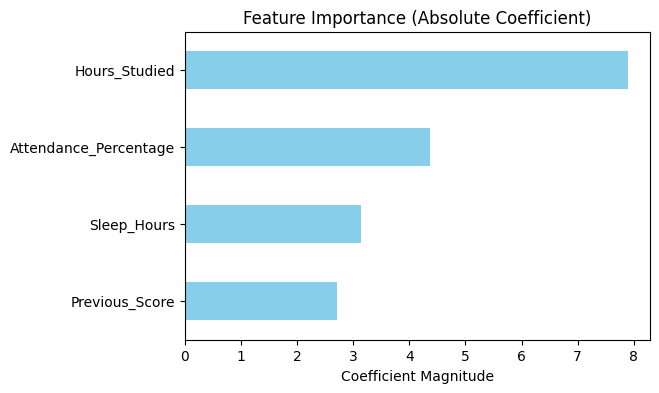

In [55]:
# 5. Feature Importance (Bar Plot)
coefs = pd.Series(reg.coef_, index=X.columns)
plt.figure(figsize=(6,4))
coefs.abs().sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance (Absolute Coefficient)')
plt.xlabel('Coefficient Magnitude')
plt.show()

### `Evaluation`

In [45]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 3.242688449084222
MSE: 16.086035842422017
RMSE: 4.010740061687121
R2 Score: 0.8674624995301019


### `Diagnostics: VIF for multicollinearity`

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_train_df.values, i) for i in range(len(X.columns))]
print(vif)

                 Feature       VIF
0          Hours_Studied  1.035166
1  Attendance_Percentage  1.041158
2         Previous_Score  1.021369
3            Sleep_Hours  1.034765
